In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate some synthetic data (non-linear regression problem)
np.random.seed(42)
X = np.random.rand(100, 1).astype(np.float32)  # 100 data points
y = (X**2 + np.random.randn(100, 1) * 0.1).astype(np.float32)  # Quadratic function with noise

In [3]:
# Convert numpy arrays to torch tensors
X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y)

In [4]:
# 3-layer neural network from scratch in PyTorch
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Manually initialize weights and biases for each layer
        self.W1 = torch.nn.Parameter(torch.randn(1, 5, dtype=torch.float32))  # Input to hidden layer weights
        self.b1 = torch.nn.Parameter(torch.zeros(1, 5, dtype=torch.float32))  # Bias for hidden layer

        self.W2 = torch.nn.Parameter(torch.randn(5, 5, dtype=torch.float32))  # Hidden to hidden layer weights
        self.b2 = torch.nn.Parameter(torch.zeros(1, 5, dtype=torch.float32))  # Bias for hidden layer

        self.W3 = torch.nn.Parameter(torch.randn(5, 1, dtype=torch.float32))  # Hidden to output layer weights
        self.b3 = torch.nn.Parameter(torch.zeros(1, 1, dtype=torch.float32))  # Bias for output layer

    def forward(self, x):
        # First hidden layer with ReLU activation
        a1 = torch.matmul(x, self.W1) + self.b1
        h1 = torch.relu(a1)

        # Second hidden layer with ReLU activation
        a2 = torch.matmul(h1, self.W2) + self.b2
        h2 = torch.relu(a2)

        # Output layer (no activation)
        a3 = torch.matmul(h2, self.W3) + self.b3
        return a3

# Instantiate the network
model = SimpleNN()

In [5]:
# Loss function (Mean Squared Error)
def compute_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

In [6]:
# Training loop
epochs = 1000
learning_rate = 0.01
losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = compute_loss(y_pred, y_train)
    losses.append(loss.item())  # Append loss value to track it

    # Backward pass and optimize
    model.zero_grad()  # Clear previous gradients
    loss.backward()    # Backpropagation to compute gradients

    # Update weights and biases manually
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.28555214405059814
Epoch 100, Loss: 0.08145435154438019
Epoch 200, Loss: 0.06361095607280731
Epoch 300, Loss: 0.04855277016758919
Epoch 400, Loss: 0.0359855517745018
Epoch 500, Loss: 0.026792168617248535
Epoch 600, Loss: 0.020894451066851616
Epoch 700, Loss: 0.017443189397454262
Epoch 800, Loss: 0.015096623450517654
Epoch 900, Loss: 0.01383526436984539


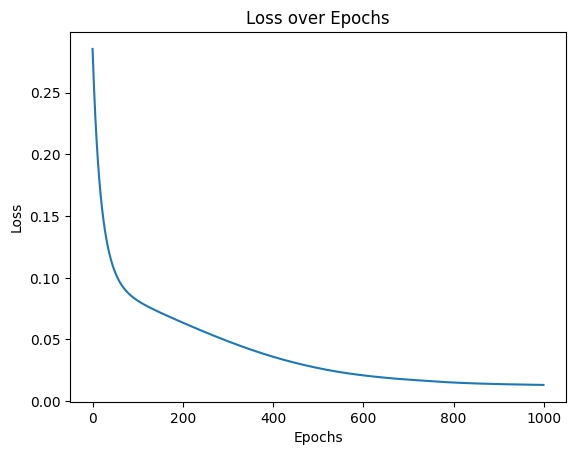

In [7]:
# Plotting the loss curve
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

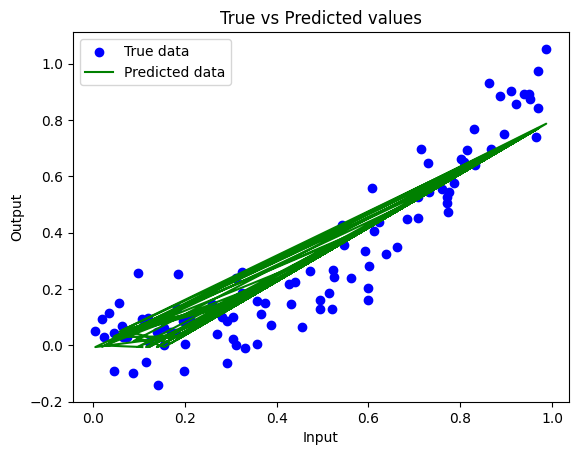

In [8]:
# Plotting the predictions vs true values
y_pred = model(X_train).detach().numpy()  # Get predictions from model
plt.scatter(X, y, color='blue', label='True data')
plt.plot(X, y_pred, color='green', label='Predicted data')
plt.title('True vs Predicted values')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()